# Richardson Lucy Visualization

This notebook was created to visualize the experiments conducted for Richardson Lucy deconvolution.

In [11]:
import astropy
from astropy.io import fits
from PIL import Image
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel, convolve
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### THE ONLY CELL BELOW: MODIFY VALUES TO CATER

In [12]:
image_dataset_name = 'fits'
change = '4_001'

In [13]:
result_data_folder_name = 'result_data_'+image_dataset_name+'/'
result_plot_folder_name = 'result_plot_'+image_dataset_name+'/'

In [14]:
# df_psnr = pd.read_csv(result_data_folder_name+'psnr_'+change+'.csv').iloc[:, -2: ]
df_ssim = pd.read_csv(result_data_folder_name+'ssim_'+change+'.csv').iloc[:, -2: ]
df_sssim = pd.read_csv(result_data_folder_name+'sssim_'+change+'.csv').iloc[:, -2: ]

In [15]:
# print(change)

# print(df_ssim['epoch_no'].mean())
# print(df_ssim['epoch_no'].std())
# print(df_sssim['epoch_no'].mean())
# print(df_sssim['epoch_no'].std())
# # print(df_psnr['epoch_no'].mean())

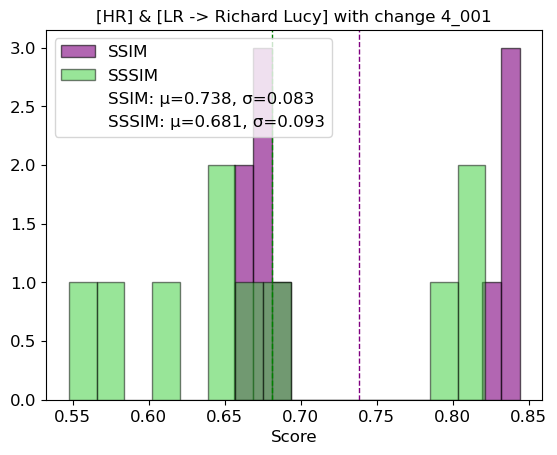

In [17]:
"""
BAR PLOT FOR SSIM AND SSSIM
"""

ssim_vals = df_ssim['best_score'].values
sssim_vals = df_sssim['best_score'].values

ssim_mean = np.mean(ssim_vals)
ssim_std = np.std(ssim_vals)
sssim_mean = np.mean(sssim_vals)
sssim_std = np.std(sssim_vals)

plt.figure()
plt.hist(ssim_vals, bins=15, alpha=0.6, color='purple', edgecolor='black', label='SSIM')
plt.hist(sssim_vals, bins=15, alpha=0.5, color='limegreen', edgecolor='black', label='SSSIM')

# text axis should be appropriately adjusted to lie in a reasonable place
# plt.text(0.05, 14, f'SSIM: μ={ssim_mean:.3f}, σ={ssim_std:.3f}', fontsize=10, color='purple')
# plt.text(0.05, 12, f'SSSIM: μ={sssim_mean:.3f}, σ={sssim_std:.3f}', fontsize=10, color='green')
plt.plot([], [], ' ', label=f'SSIM: μ={ssim_mean:.3f}, σ={ssim_std:.3f}')
plt.plot([], [], ' ', label=f'SSSIM: μ={sssim_mean:.3f}, σ={sssim_std:.3f}')
plt.legend(loc='best', fontsize=10)

plt.axvline(ssim_mean, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(sssim_mean, color='green', linestyle='dashed', linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.xlim(xmin=0, xmax=1)
plt.title("[HR] & [LR -> Richard Lucy] with change "+change)

os.makedirs(result_plot_folder_name, exist_ok=True)
plt.savefig(result_plot_folder_name+'ssim_'+change+'.png')